# Encoding groups of pixels to points

In [3]:
img = random_matrix(IntegerModRing(256), 12, 12)
img

[172  87 136 186 139 163  55 165  90  74 188  43]
[251  54  94 205  82  14  81  45  49  55 189 128]
[121  94  31 192 161  16 180 111  17 239 172  91]
[152 135 196  59 184  91 150 109  61  33  72  24]
[224 159  51  24 142 188  64 175 219  97 100 138]
[161  28 127  94 191  30 139 205 194  21 251 216]
[164 184  85 166  97 175  85  18 255  53 194 181]
[ 10 150 182 165  39 229 148 242  95   5  82 231]
[216  80 207 175 153 163 206 230  29 205  87   5]
[ 81 176  10  99 214  90 240 207   5  49  50 240]
[234  84  39   7 227 103 235 105 251  82  56 242]
[ 50 196 174 246 184 144 227 241 168 219 246 199]

## Defining functions

In [4]:
def polyeval(P, x):
    return sum([b*x^a for a,b in enumerate(reversed(P))])

In [5]:
def img2blocks(img, bsize):
    plainms = []
    for i in range(img.dimensions()[0]):
        for j in range(0, img.dimensions()[1], bsize):
            blk = map(int, img[i][j:j+bsize])
            plainm = polyeval(blk, 257)
            plainms += [plainm]
    return plainms

In [6]:
def find_y(plainm):
    for j in range(1,L+1):
        x = plainm*L+j
        y = None
        try:
            y = E.lift_x(x)
            if y != None:
                return y
                break
        except Exception:
            continue

In [7]:
def img2pts(img, bsize):
    plainms = img2blocks(img, bsize)
    imgpts = [find_y(plainm) for plainm in plainms]
    return imgpts

## Defining constants

In [8]:
blksize = 4

In [9]:
L = 30
p = 257
q = next_prime(polyeval([255,255,255,255],p)*L)
q

130362885011

In [10]:
F = GF(q)
a, b = F.random_element(), F.random_element()
E = EllipticCurve(F, [a,b])
E

Elliptic Curve defined by y^2 = x^3 + 59771411042*x + 129294234023 over Finite Field of size 130362885011

## Testing

In [11]:
I = img2pts(img, 4)
I

[(87762341912 : 73629094572 : 1),
 (71107461421 : 29690696422 : 1),
 (45979480652 : 81162378850 : 1),
 (127926415561 : 81688410677 : 1),
 (41785865223 : 22428141070 : 1),
 (25063093591 : 10730207015 : 1),
 (61804275541 : 81439151861 : 1),
 (82020378841 : 12323815146 : 1),
 (9131942614 : 663570344 : 1),
 (77673155461 : 95043642017 : 1),
 (93881226901 : 73579597701 : 1),
 (31129449541 : 74962441057 : 1),
 (114384712623 : 1851028183 : 1),
 (72684781234 : 74549215745 : 1),
 (111716053741 : 14495171407 : 1),
 (82043747342 : 13943036746 : 1),
 (97324939831 : 88602321699 : 1),
 (98835683821 : 74658675993 : 1),
 (83880248372 : 5584839109 : 1),
 (49743478771 : 75443604129 : 1),
 (129962155531 : 95345874859 : 1),
 (5391006571 : 1703500564 : 1),
 (20315178783 : 14415791881 : 1),
 (48388136553 : 95926199942 : 1),
 (110155481463 : 76764773937 : 1),
 (78237956642 : 11016731795 : 1),
 (15174768182 : 86538680061 : 1),
 (41597079782 : 69870644951 : 1),
 (109157075971 : 29702707874 : 1),
 (2643673681 : 

# Elliptic curve ElGamal

## Key generation

In [12]:
d = F.random_element()
d

23392225154

In [13]:
e1 = E.random_point()
e2 = int(d)*e1
print(e1, e2)

((105437154037 : 125095678458 : 1), (19083996055 : 21430783050 : 1))


## Encryption

In [14]:
def encrypt(pts):
    r = F.random_element()
    c1 = int(r)*e1
    c2 = [p+int(r)*e2 for p in pts]
    return (c1, c2)

In [15]:
enc = encrypt(I)
enc

((31152924580 : 84402690099 : 1),
 [(12358782636 : 71380158097 : 1),
  (89109560580 : 73921843551 : 1),
  (72867630301 : 98872687550 : 1),
  (16911220020 : 56935163400 : 1),
  (73595166150 : 128232422928 : 1),
  (119045179489 : 78690415122 : 1),
  (29778690113 : 72903118743 : 1),
  (125436881425 : 15186697945 : 1),
  (97329398830 : 91078791085 : 1),
  (88619648125 : 28236152471 : 1),
  (70906233803 : 77841663100 : 1),
  (7084998658 : 40032774799 : 1),
  (11001987759 : 95253797685 : 1),
  (21425243495 : 61213295991 : 1),
  (128505183475 : 91984713104 : 1),
  (74492993185 : 95981312869 : 1),
  (129665912547 : 44703458679 : 1),
  (21426487692 : 50252371109 : 1),
  (61470612721 : 6558498284 : 1),
  (75675159457 : 118559929828 : 1),
  (128547851097 : 115313226531 : 1),
  (99451398002 : 84330943994 : 1),
  (96035635900 : 22813438065 : 1),
  (122030730739 : 104841527053 : 1),
  (10269980952 : 42206228880 : 1),
  (45272067262 : 13590794444 : 1),
  (99117028865 : 42609477387 : 1),
  (4032444500

## Decryption

In [16]:
def decrypt(enc):
    c1, c2 = enc
    dec = [_-int(d)*c1 for _ in c2]
    return dec

In [17]:
dec = decrypt(enc)
dec

[(87762341912 : 73629094572 : 1),
 (71107461421 : 29690696422 : 1),
 (45979480652 : 81162378850 : 1),
 (127926415561 : 81688410677 : 1),
 (41785865223 : 22428141070 : 1),
 (25063093591 : 10730207015 : 1),
 (61804275541 : 81439151861 : 1),
 (82020378841 : 12323815146 : 1),
 (9131942614 : 663570344 : 1),
 (77673155461 : 95043642017 : 1),
 (93881226901 : 73579597701 : 1),
 (31129449541 : 74962441057 : 1),
 (114384712623 : 1851028183 : 1),
 (72684781234 : 74549215745 : 1),
 (111716053741 : 14495171407 : 1),
 (82043747342 : 13943036746 : 1),
 (97324939831 : 88602321699 : 1),
 (98835683821 : 74658675993 : 1),
 (83880248372 : 5584839109 : 1),
 (49743478771 : 75443604129 : 1),
 (129962155531 : 95345874859 : 1),
 (5391006571 : 1703500564 : 1),
 (20315178783 : 14415791881 : 1),
 (48388136553 : 95926199942 : 1),
 (110155481463 : 76764773937 : 1),
 (78237956642 : 11016731795 : 1),
 (15174768182 : 86538680061 : 1),
 (41597079782 : 69870644951 : 1),
 (109157075971 : 29702707874 : 1),
 (2643673681 : 

## Decoding points to groups of pixels

In [18]:
# this is basically the reverse of polyeval
def int2block(n, x, bsize):
    P = []
    for _ in range(bsize):
        P += [int(n%x)]
        n = int(n//x)
    return P[::-1]

In [19]:
def blocks2img(imgpts, bsize, dim):
    plainms = [(int(pt[0]))//L for pt in imgpts]
    dec = [int2block(plainm, p, bsize) for plainm in plainms]
    lst = [_ for l in dec for _ in l]
    imgd = Matrix(IntegerModRing(256), dim[0], dim[1], lst)
    return imgd

In [20]:
blocks2img(enc[1], blksize, (12,12))

[ 24  69  45 243 174 253 113  66 143  23 136 132]
[ 33  53 175 193 144 133 180  36 233 198  57 129]
[ 58 122 150  81 246  82 247   5 191  32 204  35]
[174   6  49 201 139  61 170  20  13 234 161  69]
[ 21 155 112  93  42  18 206  53 252  89 117 249]
[146  72 208 210 254 161  64 125  42  19 110 149]
[120 182 188  30 148 155 108 200 252 110 255   8]
[195  75 184   2 188 150 221 232 239 162 246 137]
[ 20  43   2 217  88 231 184 117 194 163 248 197]
[ 79  47 198 130 117 234 115 254 240  28 123  66]
[139 174 236 188 137 106  81 148 118 177 105 149]
[195 115  52  12 101 255 123 209 164 234 177 179]

In [21]:
imgdec = blocks2img(dec, blksize, (12,12))
imgdec

[172  87 136 186 139 163  55 165  90  74 188  43]
[251  54  94 205  82  14  81  45  49  55 189 128]
[121  94  31 192 161  16 180 111  17 239 172  91]
[152 135 196  59 184  91 150 109  61  33  72  24]
[224 159  51  24 142 188  64 175 219  97 100 138]
[161  28 127  94 191  30 139 205 194  21 251 216]
[164 184  85 166  97 175  85  18 255  53 194 181]
[ 10 150 182 165  39 229 148 242  95   5  82 231]
[216  80 207 175 153 163 206 230  29 205  87   5]
[ 81 176  10  99 214  90 240 207   5  49  50 240]
[234  84  39   7 227 103 235 105 251  82  56 242]
[ 50 196 174 246 184 144 227 241 168 219 246 199]

In [22]:
assert img == imgdec

# Homomorphic encryption
From Li, et al.

In [23]:
p1 = [[0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,255,0,0,0,0,0,0],
[0,0,0,0,0,255,0,0,0,0,0,0],
[0,0,0,0,255,255,255,0,0,0,0,0],
[0,0,0,0,255,255,255,0,0,0,0,0],
[0,0,0,255,255,255,255,255,0,0,0,0],
[0,0,0,255,255,255,255,255,0,0,0,0],
[0,0,255,255,255,255,255,255,255,0,0,0],
[0,0,255,255,255,255,255,255,255,0,0,0],
[0,0,0,0,120,120,120,0,0,0,0,0],
[0,0,0,0,120,120,120,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0]]

imgp1 = Matrix(IntegerModRing(256), p1)
imgp1

[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0 255   0   0   0   0   0   0]
[  0   0   0   0   0 255   0   0   0   0   0   0]
[  0   0   0   0 255 255 255   0   0   0   0   0]
[  0   0   0   0 255 255 255   0   0   0   0   0]
[  0   0   0 255 255 255 255 255   0   0   0   0]
[  0   0   0 255 255 255 255 255   0   0   0   0]
[  0   0 255 255 255 255 255 255 255   0   0   0]
[  0   0 255 255 255 255 255 255 255   0   0   0]
[  0   0   0   0 120 120 120   0   0   0   0   0]
[  0   0   0   0 120 120 120   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]

In [24]:
p2 = [[0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,255,255,255,255,0,0,0,0],
[0,0,0,255,200,200,200,200,255,0,0,0],
[0,0,255,200,200,100,100,200,200,255,0,0],
[0,0,255,200,100,100,100,100,200,255,0,0],
[0,0,255,200,100,100,100,100,200,255,0,0],
[0,0,255,200,200,100,100,200,200,255,0,0],
[0,0,0,255,200,200,200,200,255,0,0,0],
[0,0,0,0,255,255,255,255,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0]]

imgp2 = Matrix(IntegerModRing(256), p2)
imgp2

[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0 255 255 255 255   0   0   0   0]
[  0   0   0 255 200 200 200 200 255   0   0   0]
[  0   0 255 200 200 100 100 200 200 255   0   0]
[  0   0 255 200 100 100 100 100 200 255   0   0]
[  0   0 255 200 100 100 100 100 200 255   0   0]
[  0   0 255 200 200 100 100 200 200 255   0   0]
[  0   0   0 255 200 200 200 200 255   0   0   0]
[  0   0   0   0 255 255 255 255   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]

In [25]:
ecp1 = img2pts(imgp1, 4)
ecp1

[(3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (505274852 : 89147437950 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (505274852 : 89147437950 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (130362877353 : 20266557301 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (130362877353 : 20266557301 : 1),
 (3 : 5548125838 : 1),
 (7660 : 65191385057 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (7660 : 65191385057 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (1973703 : 91731491399 : 1),
 (130362885001 : 29481936542 : 1),
 (129855636451 : 1555339830 : 1),
 (1973703 : 91731491399 : 1),
 (130362885001 : 29481936542 : 1),
 (129855636451 : 1555339830 : 1),
 (3 : 5548125838 : 1),
 (61347236402 : 94354018852 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (61347236402 : 94354018852 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1)]

In [26]:
ecp2 = img2pts(imgp2, 4)
ecp2

[(3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (7660 : 65191385057 : 1),
 (102245400003 : 69194913040 : 1),
 (129855636451 : 1555339830 : 1),
 (1972054 : 79546892837 : 1),
 (102046482001 : 93460719226 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (51122700003 : 75823759501 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (51122700003 : 75823759501 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (102046482001 : 93460719226 : 1),
 (102352832851 : 78598593091 : 1),
 (7660 : 65191385057 : 1),
 (102245400003 : 69194913040 : 1),
 (129855636451 : 1555339830 : 1),
 (3 : 5548125838 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 :

In [27]:
enecp1 = encrypt(ecp1)
enecp1

((126749501884 : 116929451417 : 1),
 [(19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (57721354052 : 89399668240 : 1),
  (19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (57721354052 : 89399668240 : 1),
  (19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (9220028843 : 31598073174 : 1),
  (19073079291 : 64607868017 : 1),
  (19073079291 : 64607868017 : 1),
  (9220028843 : 31598073174 : 1),
  (19073079291 : 64607868017 : 1),
  (112253968810 : 75166230807 : 1),
  (104177850371 : 46540947727 : 1),
  (19073079291 : 64607868017 : 1),
  (112253968810 : 75166230807 : 1),
  (104177850371 : 46540947727 : 1),
  (19073079291 : 64607868017 : 1),
  (104032392010 : 101004625606 : 1),
  (104177850371 : 46540947727 : 1),
  (52651638311 : 48313343106 : 1),
  (104032392010 : 101004625606 : 1),
  (104177850371 : 46540947727 : 1),
  (52651638311 : 48313343106 : 1),
  (19073079

In [28]:
enecp2 = encrypt(ecp2)
enecp2

((69471905383 : 92715094851 : 1),
 [(115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (115743154769 : 699142431 : 1),
  (79245160680 : 98830865835 : 1),
  (115743154769 : 699142431 : 1),
  (56806555437 : 122325286159 : 1),
  (99595877174 : 71024252278 : 1),
  (113520649920 : 56014523538 : 1),
  (13481311383 : 21237260221 : 1),
  (21443286367 : 34478454332 : 1),
  (16570122451 : 90183397451 : 1),
  (13481311383 : 21237260221 : 1),
  (84600238577 : 42987798832 : 1),
  (16570122451 : 90183397451 : 1),
  (13481311383 : 21237260221 : 1),
  (84600238577 : 42987798832 : 1),
  (16570122451 : 90183397451 : 1),
  (13481311383 : 21237260221 : 1),
  (21443286367 : 34478454332 : 1),
  (16570122451 : 90183397451 : 1),
  (56806555437 : 122325286159 : 1),
  (99595877174 : 71024252278 : 1),
  (113520649920 : 56014523538 : 1),
  (115743154769 : 6991424

In [29]:
def addimgs(enecp1, enecp2):
    c1, c2 = enecp1
    d1, d2 = enecp2
    return (c1+d1, [c+d for c,d in zip(c2,d2)])

In [30]:
aenecp = addimgs(enecp1, enecp2)

In [31]:
aenecp

((105022286673 : 70162964300 : 1),
 [(58920384570 : 6764830657 : 1),
  (58920384570 : 6764830657 : 1),
  (58920384570 : 6764830657 : 1),
  (58920384570 : 6764830657 : 1),
  (108849898201 : 44457898572 : 1),
  (58920384570 : 6764830657 : 1),
  (58920384570 : 6764830657 : 1),
  (33497352610 : 53827791079 : 1),
  (58920384570 : 6764830657 : 1),
  (50049588748 : 18702809808 : 1),
  (80906831851 : 85101080086 : 1),
  (56379992805 : 5708835981 : 1),
  (48294596423 : 77397452633 : 1),
  (111599541214 : 2277610085 : 1),
  (46362075895 : 12959958316 : 1),
  (25688684464 : 56966090312 : 1),
  (20774424364 : 95776067242 : 1),
  (46362075895 : 12959958316 : 1),
  (25688684464 : 56966090312 : 1),
  (20774424364 : 95776067242 : 1),
  (46362075895 : 12959958316 : 1),
  (84047866001 : 89653817719 : 1),
  (124294391490 : 110485985238 : 1),
  (42947664716 : 121267232451 : 1),
  (113688602564 : 104488150770 : 1),
  (116779872085 : 101965614252 : 1),
  (83449136578 : 68642842198 : 1),
  (58920384570 : 676

In [32]:
blocks2img(aenecp[1], blksize, (12,12))

[115 180 178  58 115 180 178  58 115 180 178  58]
[115 180 178  58 213 192 234  85 115 180 178  58]
[115 180 178  58  65 200  78  29 115 180 178  58]
[ 98  72 210  12 158 225 185 131 110 183 159  33]
[ 94 215  29 150 219  38 151 171  91  10 210 106]
[ 50 114 117 177  40 204  89 223  91  10 210 106]
[ 50 114 117 177  40 204  89 223  91  10 210 106]
[165  11 237 240 244  20  96  39  84  86 166 135]
[223  64 228 114 229  82 251  80 163 223 195 184]
[115 180 178  58 122   0 224  80 115 180 178  58]
[115 180 178  58  26  81  55 228 115 180 178  58]
[115 180 178  58 115 180 178  58 115 180 178  58]

In [33]:
aecp = decrypt(aenecp)
aecp

[(62080680166 : 951747647 : 1),
 (62080680166 : 951747647 : 1),
 (62080680166 : 951747647 : 1),
 (62080680166 : 951747647 : 1),
 (63917088065 : 3313999277 : 1),
 (62080680166 : 951747647 : 1),
 (62080680166 : 951747647 : 1),
 (66067643799 : 3274390669 : 1),
 (62080680166 : 951747647 : 1),
 (25589388226 : 40790133898 : 1),
 (122128918827 : 1834328073 : 1),
 (108404187985 : 97761065171 : 1),
 (66743344710 : 23744523081 : 1),
 (63220141133 : 21917816792 : 1),
 (24634314439 : 949707309 : 1),
 (32514335239 : 81397177950 : 1),
 (14863996234 : 16980013095 : 1),
 (24634314439 : 949707309 : 1),
 (32514335239 : 81397177950 : 1),
 (14863996234 : 16980013095 : 1),
 (24634314439 : 949707309 : 1),
 (120041544637 : 99869362287 : 1),
 (51984700981 : 84024497662 : 1),
 (37245986665 : 80467142071 : 1),
 (42852463913 : 74209882915 : 1),
 (60298399077 : 15979530473 : 1),
 (29165480211 : 110133673233 : 1),
 (62080680166 : 951747647 : 1),
 (71484014948 : 30521901654 : 1),
 (62080680166 : 951747647 : 1),
 (6

In [34]:
ecp2d = [a-b for a,b in zip(aecp, ecp1)]
ecp2d

[(3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (7660 : 65191385057 : 1),
 (102245400003 : 69194913040 : 1),
 (129855636451 : 1555339830 : 1),
 (1972054 : 79546892837 : 1),
 (102046482001 : 93460719226 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (51122700003 : 75823759501 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (51122700003 : 75823759501 : 1),
 (102352832851 : 78598593091 : 1),
 (1972054 : 79546892837 : 1),
 (102046482001 : 93460719226 : 1),
 (102352832851 : 78598593091 : 1),
 (7660 : 65191385057 : 1),
 (102245400003 : 69194913040 : 1),
 (129855636451 : 1555339830 : 1),
 (3 : 5548125838 : 1),
 (130362885001 : 29481936542 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 : 1),
 (3 : 5548125838 :

In [35]:
p2d = blocks2img(ecp2d, blksize, (12,12))
p2d

[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0 255 255 255 255   0   0   0   0]
[  0   0   0 255 200 200 200 200 255   0   0   0]
[  0   0 255 200 200 100 100 200 200 255   0   0]
[  0   0 255 200 100 100 100 100 200 255   0   0]
[  0   0 255 200 100 100 100 100 200 255   0   0]
[  0   0 255 200 200 100 100 200 200 255   0   0]
[  0   0   0 255 200 200 200 200 255   0   0   0]
[  0   0   0   0 255 255 255 255   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0]

In [36]:
assert imgp2 == p2d

In [37]:
blocks2img(aecp, blksize, (12,12))

[121 233 158 229 121 233 158 229 121 233 158 229]
[121 233 158 229 125 132 105  24 121 233 158 229]
[121 233 158 229 129 189 190 205 121 233 158 229]
[ 50  64  88 205 239 212 131 178 212 224 249 247]
[131  16 193  89 124  37 173 231  48  96  88  30]
[ 63 218  51  26  29  48 128  96  48  96  88  30]
[ 63 218  51  26  29  48 128  96  48  96  88  30]
[235 187  16 191 102  21 108  95  73  36  38  69]
[ 84  38 154 211 118 105  37   7  57  70  28 246]
[121 233 158 229 140  96  65  69 121 233 158 229]
[121 233 158 229 158 127 180 216 121 233 158 229]
[121 233 158 229 121 233 158 229 121 233 158 229]

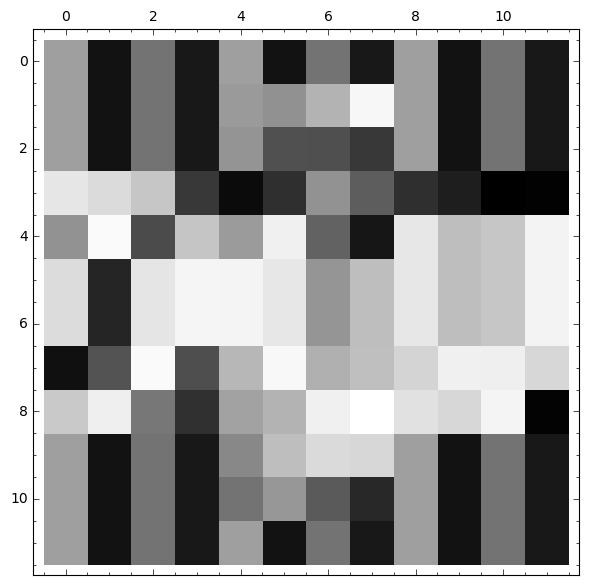

In [38]:
matrix_plot(blocks2img(aecp, blksize, (12,12)))

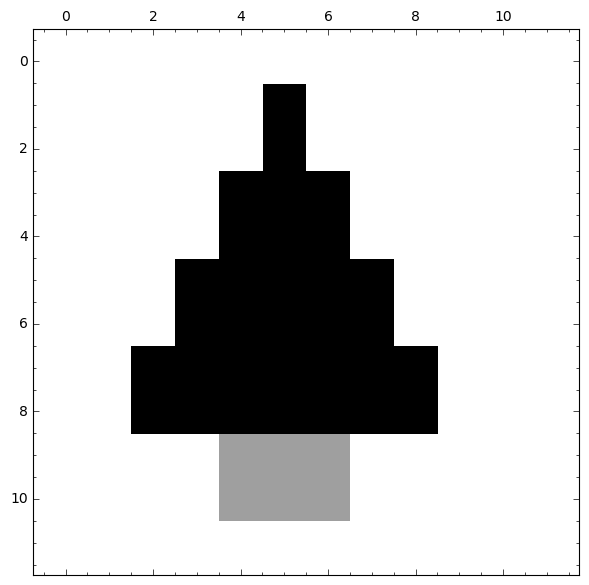

In [39]:
matrix_plot(imgp1)

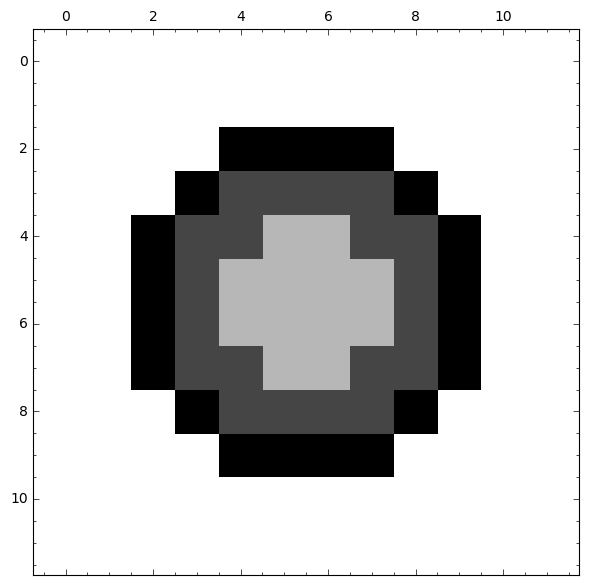

In [40]:
matrix_plot(imgp2)

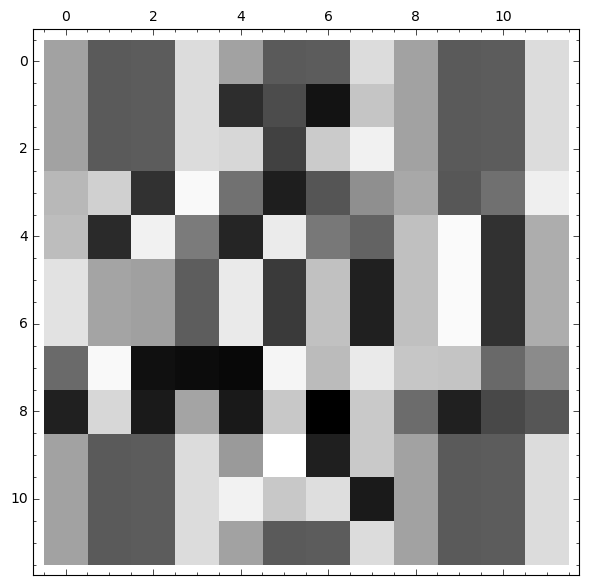

In [41]:
matrix_plot(blocks2img(aenecp[1], blksize, (12,12)))